In [194]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [195]:
# load in races csv file
csv_path = "Resources/races.csv"
races_df = pd.read_csv(csv_path)
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [196]:
# load in results csv file
csv_path = "Resources/results.csv"
results_df = pd.read_csv(csv_path)
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [197]:
# load in status csv file
csv_path = "Resources/status.csv"
status_df = pd.read_csv(csv_path)
status_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [198]:
# merge the status dataframe into the results dataframe
merged_res_stat_df = pd.merge(results_df, status_df, on=['statusId'])
merged_res_stat_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Finished
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,Finished
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,Finished
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,Finished
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,Finished


In [199]:
# merge the races dataframe into the merged_res_stat dataframe
merged_df = pd.merge(merged_res_stat_df, races_df, on=['raceId'])
merged_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,18,2,2,3,5,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,18,3,3,7,7,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,18,4,4,5,11,4,4,4,5.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [200]:
# save merged file to csv
merged_df.to_csv('fully_merged.csv', index=True)

In [201]:
# create copy of merged dataframe and sort by year
# create a new dataframe to store resultId, raceId, driverId, statusId, status and date
id_df = merged_df[['resultId','raceId','driverId','statusId','status','year']].copy().sort_values(by='year')
id_df.head()

,resultId,raceId,driverId,statusId,status,year
20193,20089,835,797,20,Spun off,1950
20205,20180,835,803,51,Oil pressure,1950
20204,20096,835,611,51,Oil pressure,1950
20203,20093,835,798,51,Oil pressure,1950
20202,20078,835,518,15,+5 Laps,1950


In [203]:
# create dataframe with the row information from columns
select_df = id_df['status'].isin(['Accident', 'Collision', 'Injury', 'Injured','Eye injury'])
injured_accident_df = id_df.loc[select_df]
injured_accident_df

,resultId,raceId,driverId,statusId,status,year
20225,20117,836,704,3,Accident,1950
20224,20113,836,789,3,Accident,1950
20176,20066,834,792,3,Accident,1950
20175,20063,834,762,3,Accident,1950
20174,20062,834,787,3,Accident,1950
...,...,...,...,...,...,...
25578,25583,1082,852,3,Accident,2022
25596,25605,1083,848,4,Collision,2022
25595,25604,1083,855,4,Collision,2022
25594,25603,1083,847,4,Collision,2022


In [204]:
# save file to csv
injured_accident_df.to_csv('accidents.csv', index=False)

In [205]:
# create a copy of dataframe
# replace data in statusid column with '1'
statusId_df = injured_accident_df.copy()
statusId_df['statusId'].replace([3,4,82,73,107],1,inplace=True)
statusId_df

,resultId,raceId,driverId,statusId,status,year
20225,20117,836,704,1,Accident,1950
20224,20113,836,789,1,Accident,1950
20176,20066,834,792,1,Accident,1950
20175,20063,834,762,1,Accident,1950
20174,20062,834,787,1,Accident,1950
...,...,...,...,...,...,...
25578,25583,1082,852,1,Accident,2022
25596,25605,1083,848,1,Collision,2022
25595,25604,1083,855,1,Collision,2022
25594,25603,1083,847,1,Collision,2022


In [206]:
# replace data in status column with injured and accident
statusId_df['status'].replace({'Injury':'Injured', 'Eye injury':'Injured', 'Collision':'Accident'}, inplace=True)
statusId_df

,resultId,raceId,driverId,statusId,status,year
20225,20117,836,704,1,Accident,1950
20224,20113,836,789,1,Accident,1950
20176,20066,834,792,1,Accident,1950
20175,20063,834,762,1,Accident,1950
20174,20062,834,787,1,Accident,1950
...,...,...,...,...,...,...
25578,25583,1082,852,1,Accident,2022
25596,25605,1083,848,1,Accident,2022
25595,25604,1083,855,1,Accident,2022
25594,25603,1083,847,1,Accident,2022


In [207]:
# select rows where the status is accident
accidents_df = statusId_df.loc[statusId_df['status'] =='Accident',['resultId','raceId','driverId','statusId','status','year']].sort_values(by='year')
accidents_df

,resultId,raceId,driverId,statusId,status,year
20225,20117,836,704,1,Accident,1950
20166,20064,834,501,1,Accident,1950
20167,20055,834,498,1,Accident,1950
20168,20056,834,642,1,Accident,1950
20169,20057,834,786,1,Accident,1950
...,...,...,...,...,...,...
25635,25644,1085,844,1,Accident,2022
25678,25684,1087,822,1,Accident,2022
25594,25603,1083,847,1,Accident,2022
25777,25783,1093,840,1,Accident,2022


In [208]:
# select rows where the status is injured
injured_df = statusId_df.loc[statusId_df['status'] =='Injured',['resultId','raceId','driverId','statusId','status','year']].sort_values(by='year')
injured_df

,resultId,raceId,driverId,statusId,status,year
16923,16924,695,389,1,Injured,1966
15465,15464,625,337,1,Injured,1972
13362,13363,547,182,1,Injured,1977
11481,11481,480,175,1,Injured,1982
9994,9997,426,95,1,Injured,1985
9035,9037,389,137,1,Injured,1987
8672,8674,377,122,1,Injured,1988
7482,7486,334,151,1,Injured,1990
5892,5894,284,70,1,Injured,1993
5221,5221,259,22,1,Injured,1994


In [209]:
# find the total number of accidents per year
accidents_count_df = accidents_df.groupby('year')['status'].count()
accidents_count_df

year
1950    13
1951     9
1952     5
1953    13
1954    13
        ..
2018    26
2019    21
2020    18
2021    26
2022    18
Name: status, Length: 73, dtype: int64

In [210]:
# find the total number of injured per year
injured_count_df = injured_df.groupby('year')['status'].count()
injured_count_df

year
1966    1
1972    1
1977    1
1982    1
1985    1
1987    1
1988    1
1990    1
1993    1
1994    3
1995    1
1996    1
1997    1
1998    1
2002    2
2003    1
2009    1
2011    1
Name: status, dtype: int64

In [211]:
# merge the injured and accident info into one dataframe
accident_injury_df = pd.merge(accidents_count_df, injured_count_df, on=['year'], how= 'left')
accident_injury_df.head()

,status_x,status_y
year,,
1950,13,NaN
1951,9,NaN
1952,5,NaN
1953,13,NaN
1954,13,NaN


In [212]:
# rename the two columns
accident_injury_df = accident_injury_df.rename(columns={'status_x': 'accidents', 'status_y': 'Injured'})
accident_injury_df.head(20)

,accidents,Injured
year,,
1950,13,NaN
1951,9,NaN
1952,5,NaN
1953,13,NaN
1954,13,NaN
1955,13,NaN
1956,15,NaN
1957,15,NaN
1958,24,NaN


In [213]:
# replace any NaN entries with '0' in the injured column
accident_injury_df['Injured'].fillna(0, inplace= True)
accident_injury_df

,accidents,Injured
year,,
1950,13,0.0
1951,9,0.0
1952,5,0.0
1953,13,0.0
1954,13,0.0
...,...,...
2018,26,0.0
2019,21,0.0
2020,18,0.0


In [221]:
# in the injured column convert values from float to integers
accident_injury_df['Injured'] = accident_injury_df['Injured'].astype(int)
accident_injury_df.head(50)

,year,accidents,Injured
0,1950,13,0
1,1951,9,0
2,1952,5,0
3,1953,13,0
4,1954,13,0
5,1955,13,0
6,1956,15,0
7,1957,15,0
8,1958,24,0
9,1959,16,0


In [216]:
# set index as a column
accident_injury_df.reset_index(inplace=True)
accident_injury_df

,year,accidents,Injured
0,1950,13,0
1,1951,9,0
2,1952,5,0
3,1953,13,0
4,1954,13,0
...,...,...,...
68,2018,26,0
69,2019,21,0
70,2020,18,0
71,2021,26,0


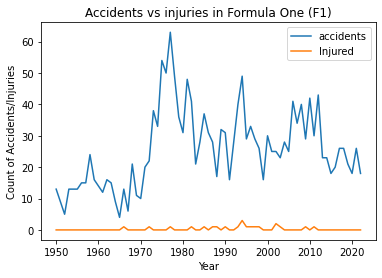

In [218]:
# create plot chart
accident_injury_df.plot(x='year', y=['accidents', 'Injured'])

#Add labels and title
plt.xlabel('Year')
plt.ylabel('Count of Accidents/Injuries')
plt.title('Accidents vs injuries in Formula One (F1)');

# save the chart
plt.savefig('accident_vs_injured.png')

# OBSERVATIONS

While accidents took a sharp up turn in the mid to late 70s and then had a downward trend across the remaining years until the current 2022 season, the amount of injury figures have not shown to have been affected by the upturn during the 1970's or any other era that Formula One races have been held. With a maximum of 3 injuries being reported in 1994. No injuries have been reported across the years of 1950 - 1965 and 2012 to 2022.

The latter part of 2000's showed accidents in the mid to high 30's per year compared to low to mid 20's per year in the last 10 years.

Overall from the 1970's through to the current season we have seen a drop off of accidents along with no injuries to drivers in the last decade can be put down to an overall improvement of Safety in Formula One.

